# Perguntas para Análise Exploratória de Dados (EDA)

Este conjunto de perguntas foi elaborado para orientar uma EDA sobre um dataset de estudantes com informações de hábitos, estilo de vida, desempenho acadêmico e características pessoais.

## 1. Perfil dos Estudantes
- Qual é a distribuição de idade dos estudantes?
- Qual é a proporção de gênero?
- Qual a distribuição da escolaridade dos pais?

## 2. Hábitos e Estilo de Vida
- Qual é a média de horas de estudo por dia? Há diferenças por gênero?
- Estudantes que trabalham meio período estudam menos?
- Qual a relação entre horas de redes sociais/Netflix e horas de estudo?
- Qual é a média de horas de sono por dia? Existe alguma relação entre sono e notas?
- Estudantes que se exercitam mais têm melhor saúde mental?

## 3. Desempenho Acadêmico
- Qual é a média de notas por categoria (`nota_prova_cat`)?
- Estudantes com maior frequência nas aulas têm melhores notas?
- Estudantes com pais com maior escolaridade têm melhor desempenho?


In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import plotly.express as px

In [19]:
warnings.filterwarnings("ignore")

#Comando para exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_parquet("dados_parquet")
df.drop(columns=['id'], inplace=True)

In [20]:
df.dtypes

idade                              uint8
genero                          category
horas_estudo_pdia                float16
horas_redessoc_pdia              float16
horas_netflix_pdia               float16
trabalha_meio_periodo               bool
porcentagem_frequencia           float16
horas_sono_pdia                  float16
qualidade_dieta                 category
frequencia_exercicio               uint8
escolaridade_dos_pais           category
qualidade_internet              category
classificacao_saude_mental         uint8
participacao_extracurricular        bool
notas_prova                      float16
nota_prova_cat                  category
dtype: object

### Analisando distribuição de valores com Boxplot

In [45]:
plt.rcParams["figure.figsize"] = [15.00, 15.00]
plt.rcParams["figure.autolayout"] = True

In [46]:
numeric_df = df.select_dtypes(include='number')
numeric_df.dtypes

idade                           uint8
horas_estudo_pdia             float16
horas_redessoc_pdia           float16
horas_netflix_pdia            float16
porcentagem_frequencia        float16
horas_sono_pdia               float16
frequencia_exercicio            uint8
classificacao_saude_mental      uint8
notas_prova                   float16
dtype: object

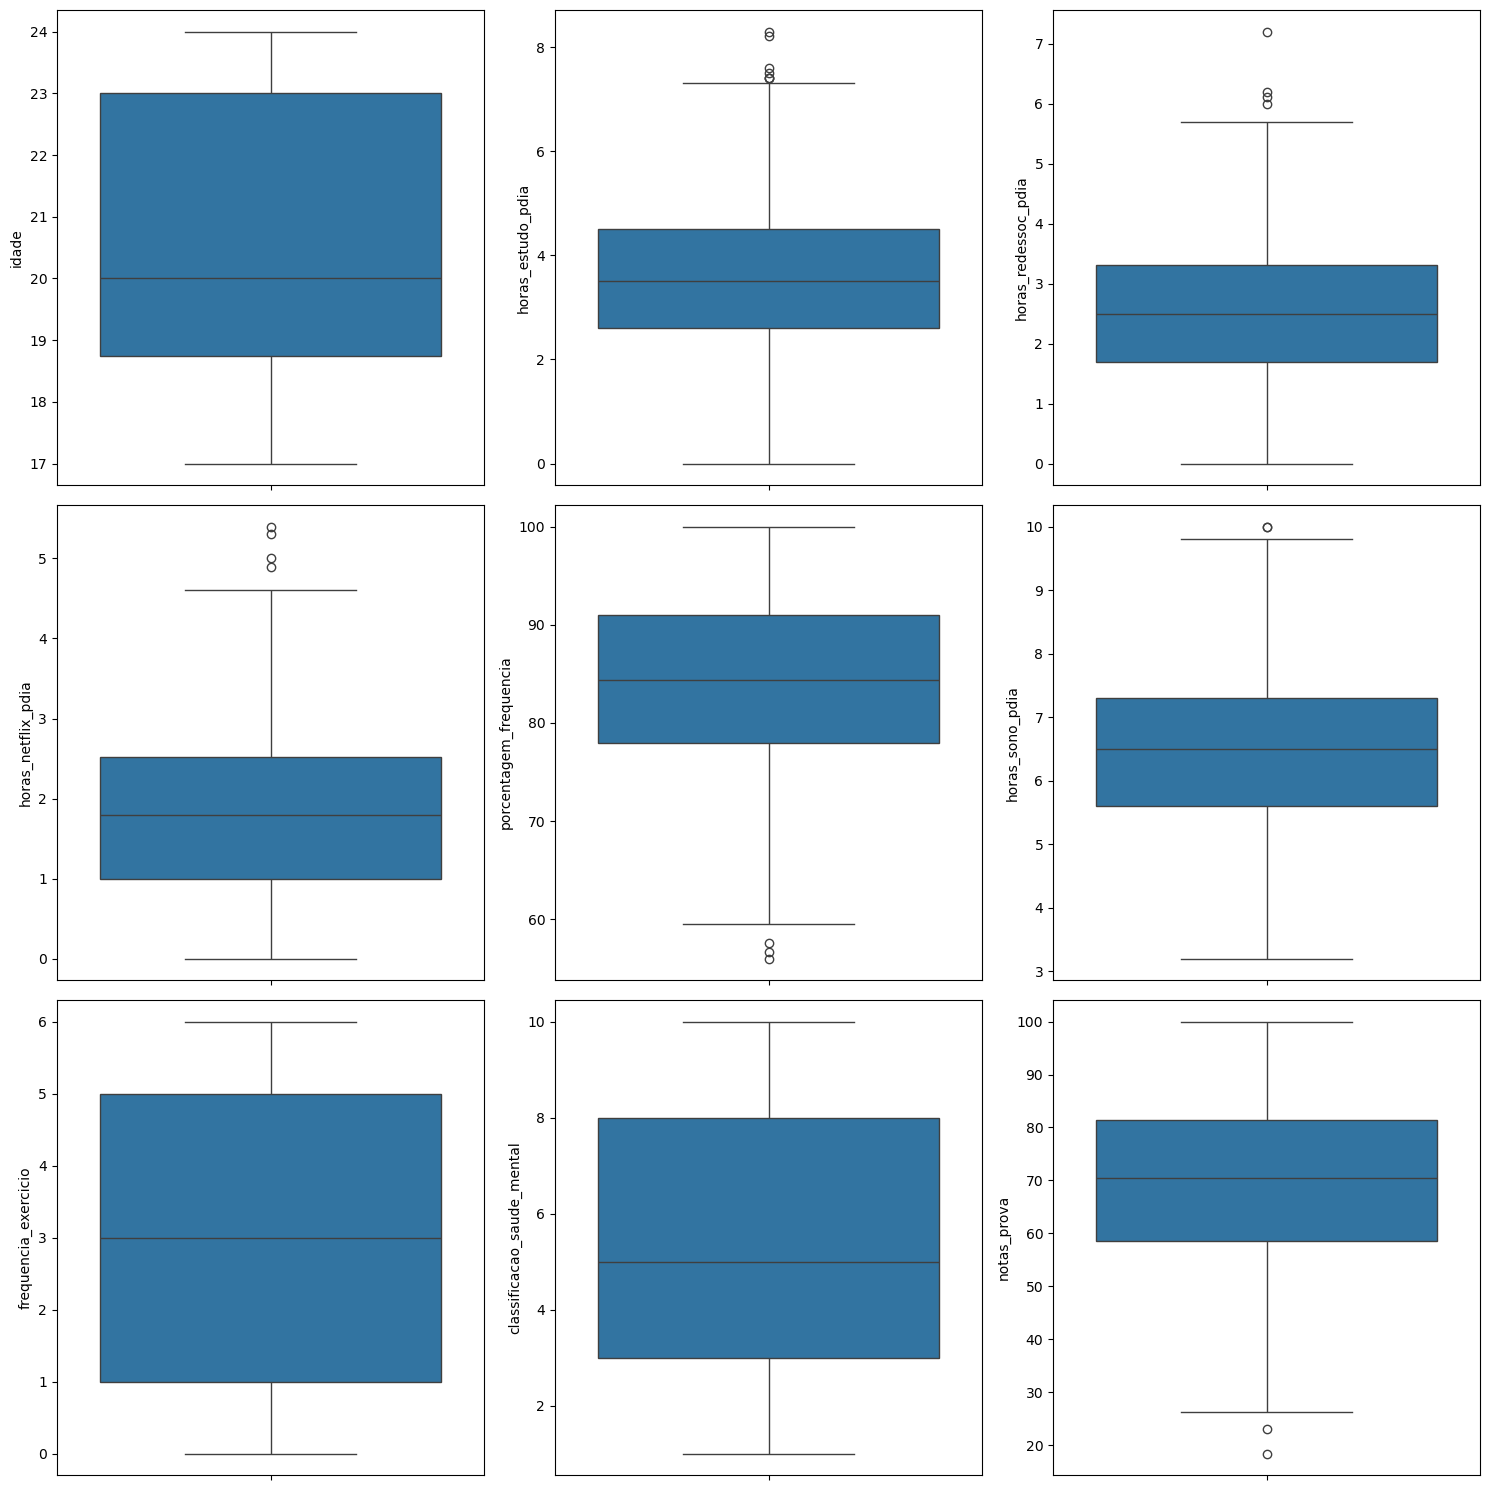

In [47]:
f, axes = plt.subplots(3, 3) #3 linhas e 3 colunas
linha = 0
coluna = 0

for i in numeric_df:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0
        
plt.show()


In [68]:
# Criando o df somente com as categoricas
categoric_df = df.select_dtypes(include=["category","bool"])
categoric_df.head()

,genero,trabalha_meio_periodo,qualidade_dieta,escolaridade_dos_pais,qualidade_internet,participacao_extracurricular,nota_prova_cat
0,F,False,Razoavel,Mestrado,Mediana,True,media
1,F,False,Boa,Ensino medio,Mediana,False,boa
2,M,False,Baixa,Ensino medio,Baixa,False,baixa
3,F,False,Baixa,Mestrado,Boa,True,baixa
4,F,False,Razoavel,Mestrado,Boa,False,media


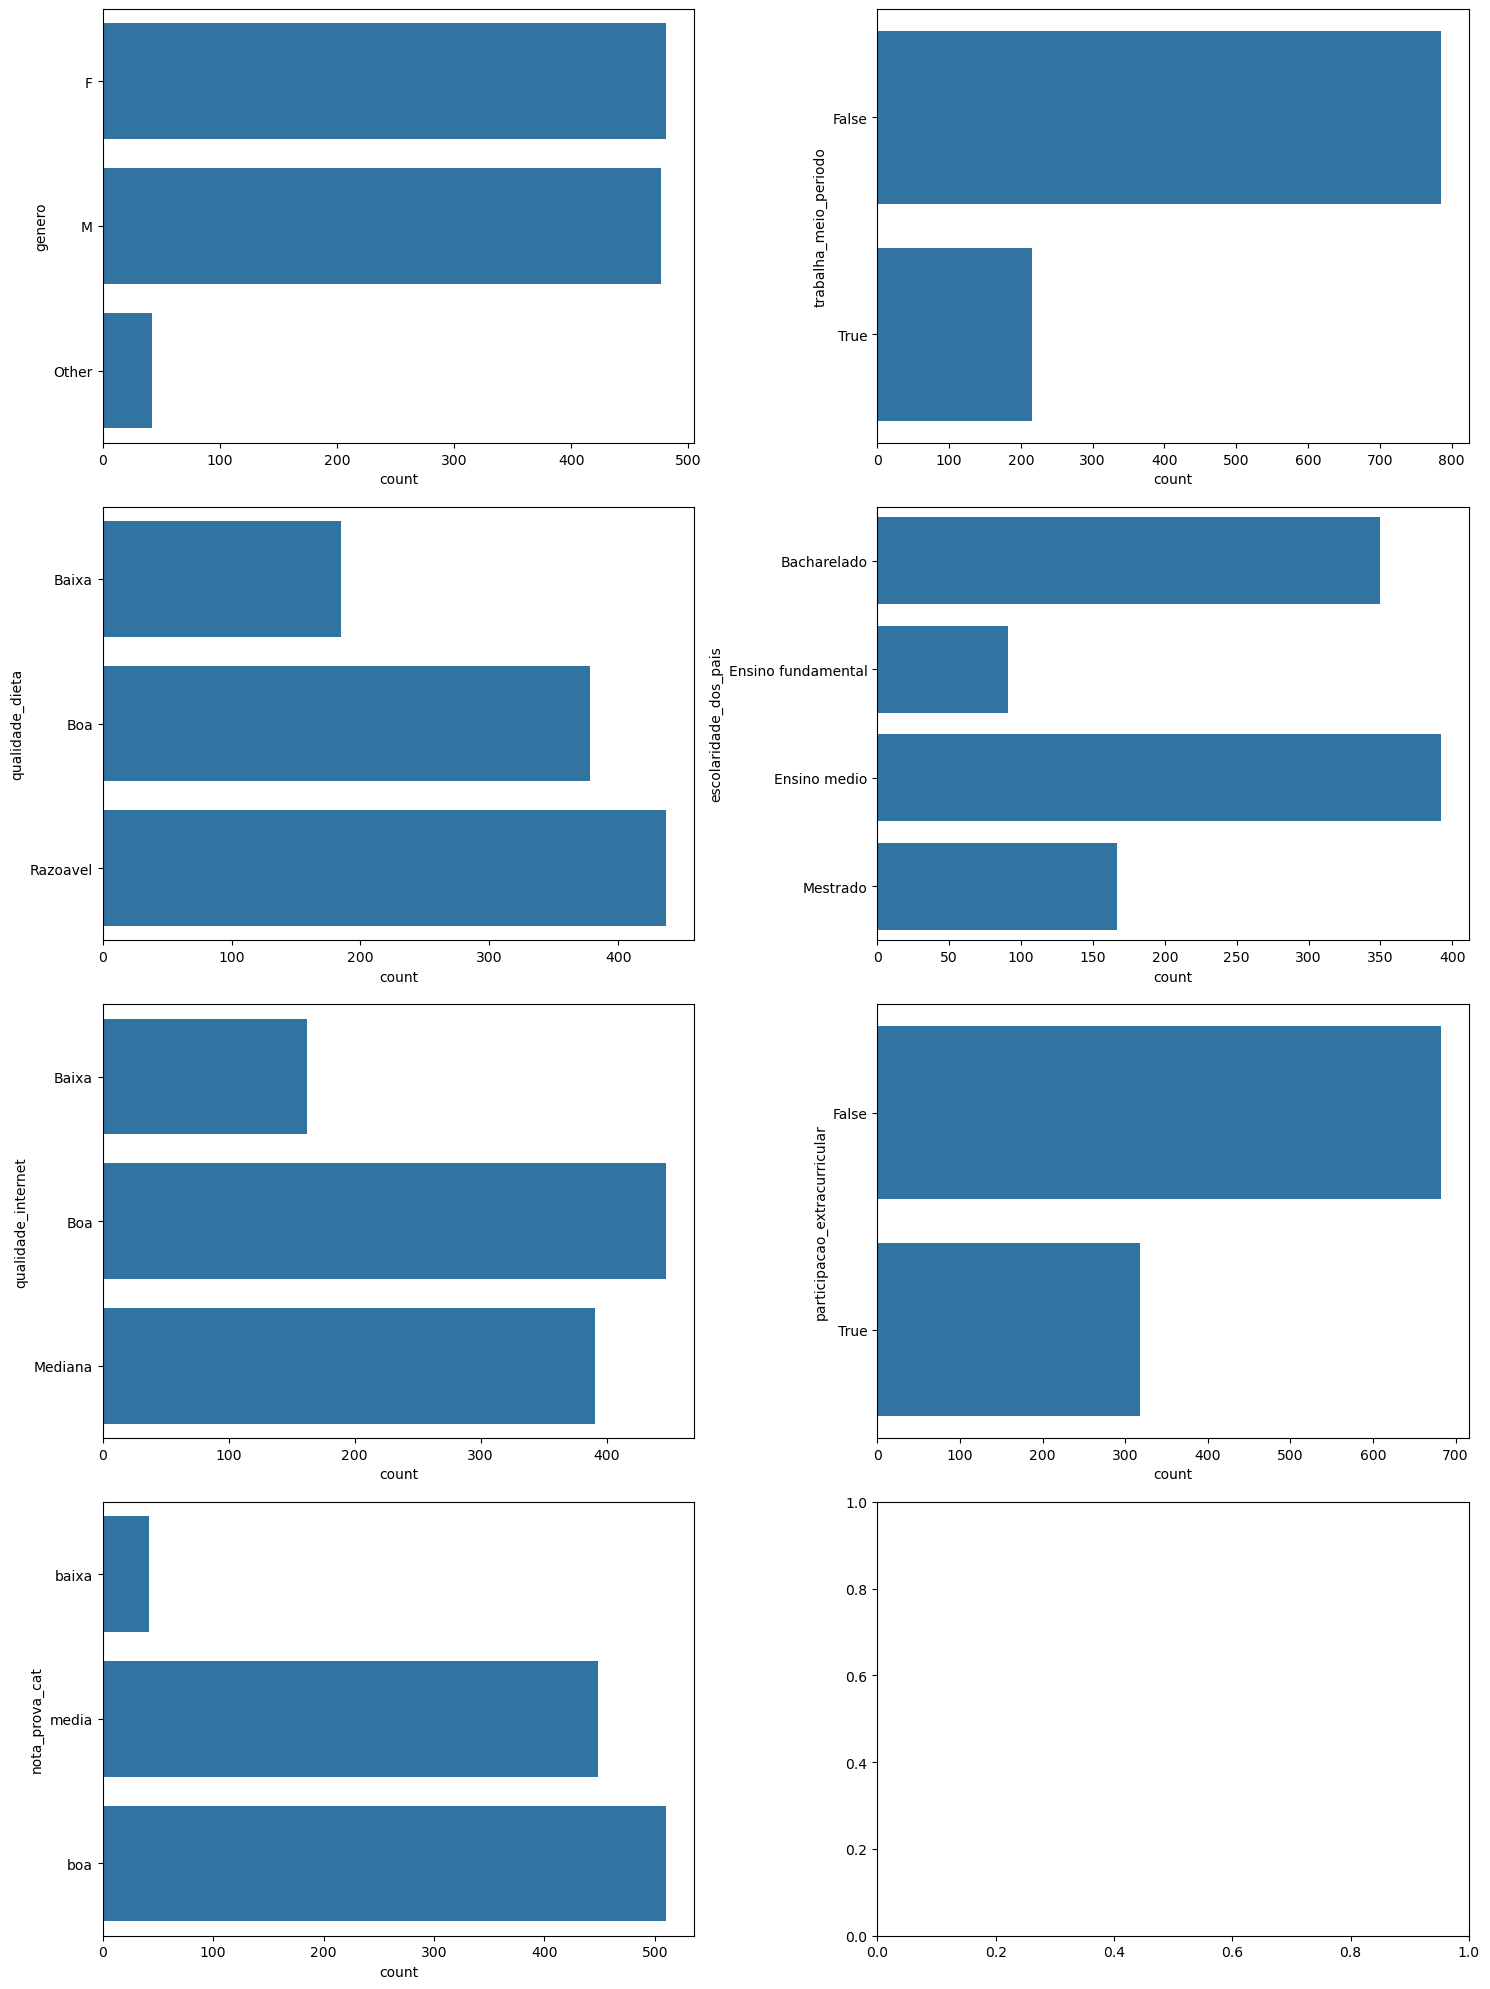

In [72]:
plt.rcParams["figure.figsize"] = [15.00, 20.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(4, 2)
linha = 0
coluna = 0

for i in categoric_df:
    sns.countplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0
        
plt.show()

### Histograma

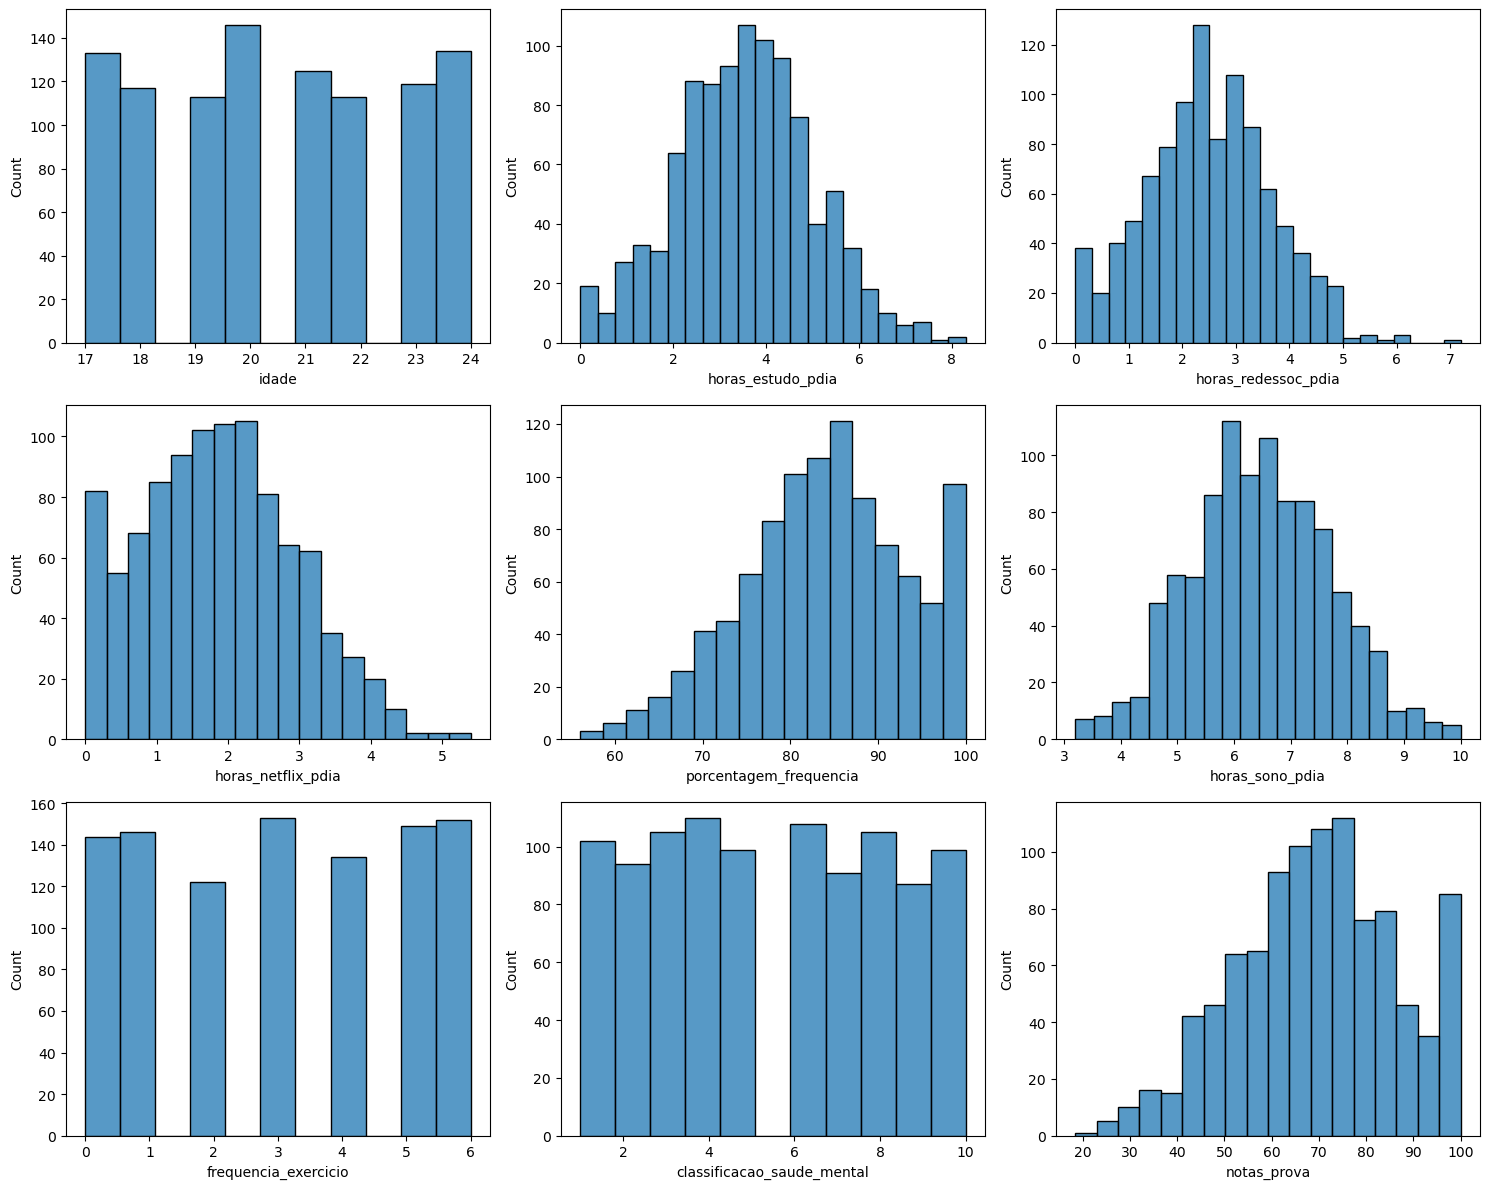

In [36]:
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 3) #3 linhas e 3 colunas
linha = 0
coluna = 0
for i in numeric_df:
     sns.histplot(data = df, x=i, ax=axes[linha][coluna])
     coluna += 1
     if coluna == 3:
         linha += 1
         coluna = 0
    
plt.show()

### Correlação entre variáveis numéricas

In [39]:
correlation_matrix = numeric_df.corr(method='spearman')


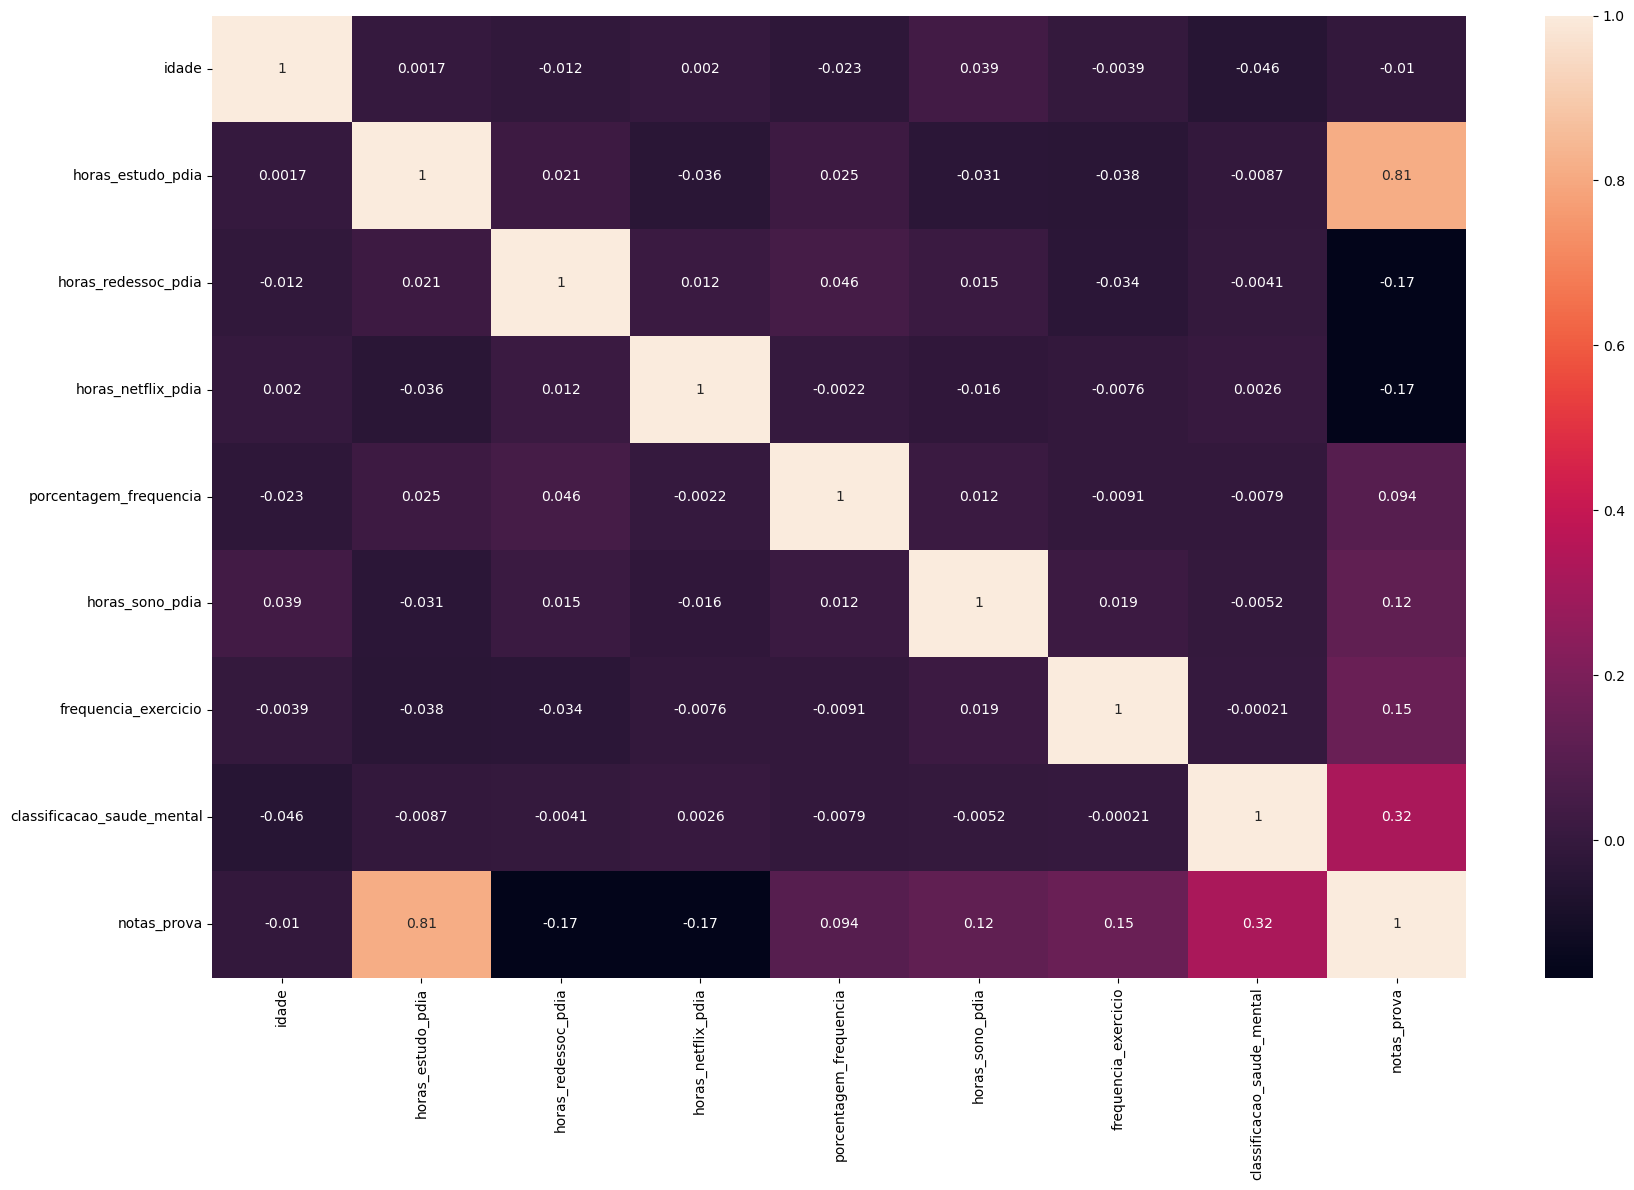

In [62]:
plt.rcParams["figure.figsize"] = (18,12)
ax = sns.heatmap(correlation_matrix, annot=True)


## 1. Perfil dos Estudantes
- Qual é a distribuição de idade dos estudantes?
- Qual é a proporção de gênero?
- Qual a distribuição da escolaridade dos pais?

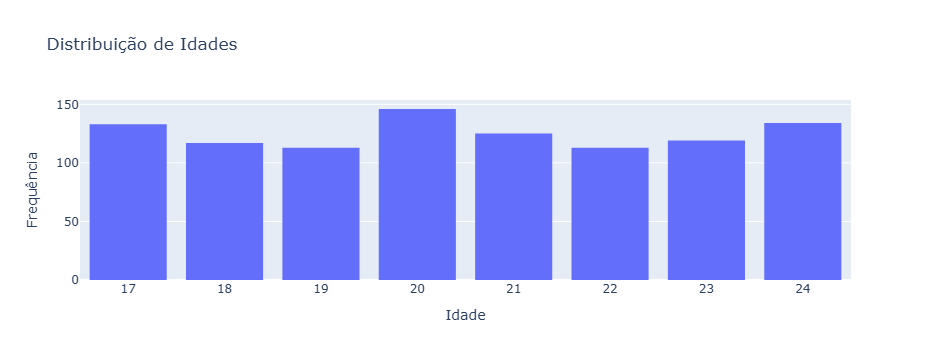

In [61]:
# Histograma interativo
fig = px.histogram(df, x='idade', title='Distribuição de Idades')
fig.update_layout(bargap=0.1, xaxis_title='Idade', yaxis_title='Frequência')
fig.show()

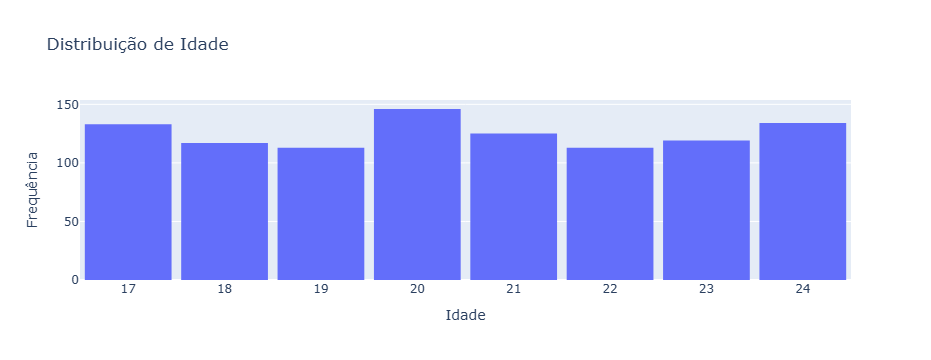

In [75]:
fig = px.histogram(df, x='idade', nbins=10, title='Distribuição de Idade')
fig.update_layout(bargap=0.1, xaxis_title='Idade', yaxis_title='Frequência')
fig.show()

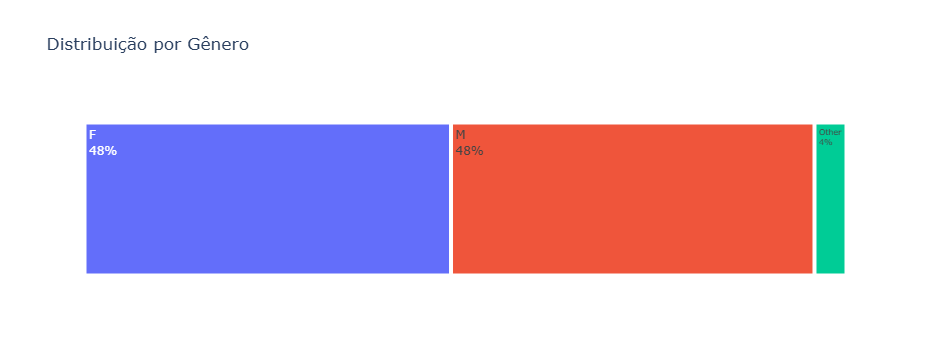

In [66]:
fig = px.treemap(df, path=['genero'], title='Distribuição por Gênero')
fig.update_traces(textinfo='label+percent parent')
fig.show()

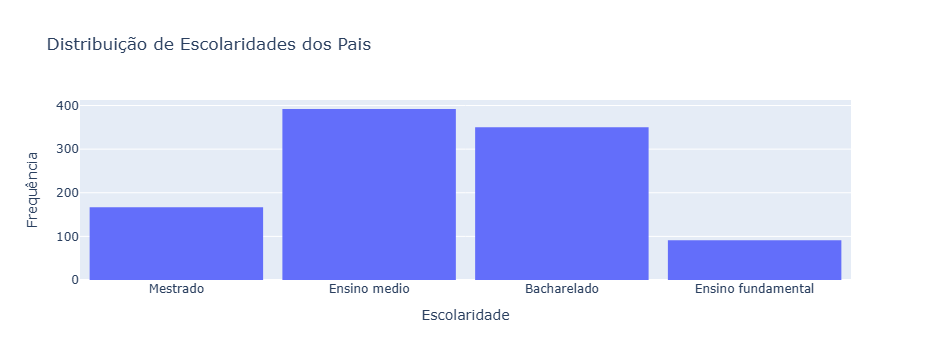

In [76]:
fig = px.histogram(df, x='escolaridade_dos_pais', nbins=10, title='Distribuição de Escolaridades dos Pais')
fig.update_layout(bargap=0.1, xaxis_title='Escolaridade', yaxis_title='Frequência')
fig.show()

## 2. Hábitos e Estilo de Vida
- Qual é a média de horas de estudo por dia? Há diferenças por gênero?
- Estudantes que trabalham meio período estudam menos?
- Qual a relação entre horas de redes sociais/Netflix e horas de estudo?
- Qual é a média de horas de sono por dia? Existe alguma relação entre sono e notas?
- Estudantes que se exercitam mais têm melhor saúde mental?

In [84]:
df.columns

Index(['idade', 'genero', 'horas_estudo_pdia', 'horas_redessoc_pdia',
       'horas_netflix_pdia', 'trabalha_meio_periodo', 'porcentagem_frequencia',
       'horas_sono_pdia', 'qualidade_dieta', 'frequencia_exercicio',
       'escolaridade_dos_pais', 'qualidade_internet',
       'classificacao_saude_mental', 'participacao_extracurricular',
       'notas_prova', 'nota_prova_cat'],
      dtype='object')

In [79]:
# Qual é a média de horas de estudo por dia?
df["horas_estudo_pdia"].mean()

3.55

In [83]:
# Há diferenças por gênero?
df.groupby("genero")["horas_estudo_pdia"].mean().to_frame()

,horas_estudo_pdia
genero,
F,3.583806
M,3.510767
Other,3.611979


In [88]:
# Estudantes que trabalham meio período estudam menos?
df.groupby("trabalha_meio_periodo")["horas_estudo_pdia"].mean().to_frame()

,horas_estudo_pdia
trabalha_meio_periodo,
False,3.572546
True,3.468375


In [89]:
# Análise de estudo (horas por dia) por gênero e trabalho de meio período
df.groupby(["genero", "trabalha_meio_periodo"])["horas_estudo_pdia"].mean().to_frame()

horas_estudo_pdia
genero trabalha_meio_periodo                   
F      False                           3.607813
       True                            3.487526
M      False                           3.517765
       True                            3.487141
Other  False                           3.778229
       True                            3.079980

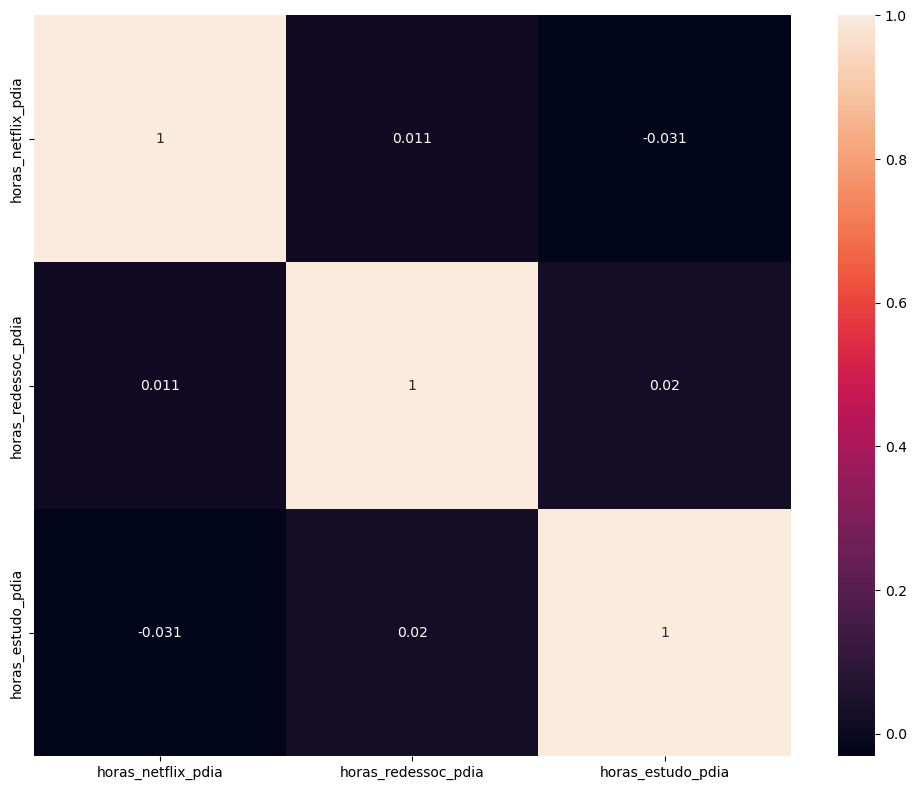

In [95]:
# Qual a relação entre horas de redes sociais/Netflix e horas de estudo?
corr_redes_netflix_estudos = df[['horas_netflix_pdia', 'horas_redessoc_pdia', 'horas_estudo_pdia']].corr()
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(corr_redes_netflix_estudos, annot=True)


In [96]:
# Qual é a média de horas de sono por dia? 
df["horas_sono_pdia"].mean()

6.473

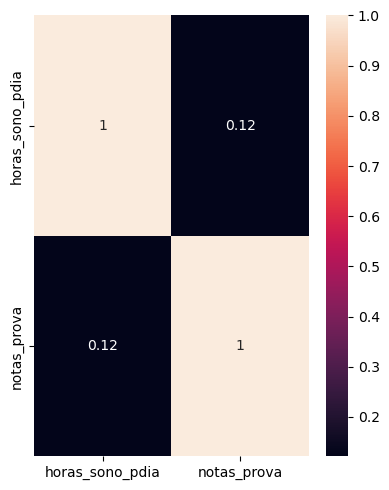

In [103]:
# Existe alguma relação entre sono e notas?
plt.rcParams["figure.figsize"] = (4,5)
ax = sns.heatmap(df[["horas_sono_pdia","notas_prova"]].corr(), annot=True)

In [105]:
# Estudantes que se exercitam mais têm melhor saúde mental?
df.groupby("frequencia_exercicio")["classificacao_saude_mental"].mean().to_frame()

,classificacao_saude_mental
frequencia_exercicio,
0,5.222222
1,5.458904
2,5.532787
3,5.810458
4,5.283582
5,5.416107
6,5.328947


## 3. Desempenho Acadêmico
- Qual é a média de notas por categoria (`nota_prova_cat`)?
- Estudantes com maior frequência nas aulas têm melhores notas?
- Estudantes com pais com maior escolaridade têm melhor desempenho?

In [106]:
# Média de notas por categoria
df.groupby("nota_prova_cat")["notas_prova"].mean()

nota_prova_cat
baixa    33.063988
media    57.845913
boa      82.936150
Name: notas_prova, dtype: float32

In [112]:
# Estudantes com frequência maior que 80%
filtro = df["porcentagem_frequencia"] > 80.0
df_alunos_frequentes = df.loc[filtro]

# Ver a média das notas desses alunos
df_alunos_frequentes['notas_prova'].mean()


70.3

In [120]:
# Estudantes com frequência menor que 70%
filtro = df["porcentagem_frequencia"] < 70.0
df_alunos_faltantes= df.loc[filtro]

# Ver a média das notas desses alunos
df_alunos_faltantes['notas_prova'].mean()


67.7

In [121]:
# Estudantes com pais com maior escolaridade têm melhor desempenho?
df.groupby("escolaridade_dos_pais")["notas_prova"].mean()

escolaridade_dos_pais
Bacharelado           70.272057
Ensino fundamental    70.029015
Ensino medio          69.547356
Mestrado              68.087852
Name: notas_prova, dtype: float32